In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# 예제 6.14 : Image Augmentation 데이터 표시

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 100

# numpy.tile(A, reps) : A를 reps에 정해진 형식만큼 반복한 값을 반환합니다.
x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28 * 28), 100).reshape(-1, 28, 28, 1),
                                   np.zeros(augment_size), 
                                   batch_size = augment_size,  
                                   shuffle = False).next()[0]

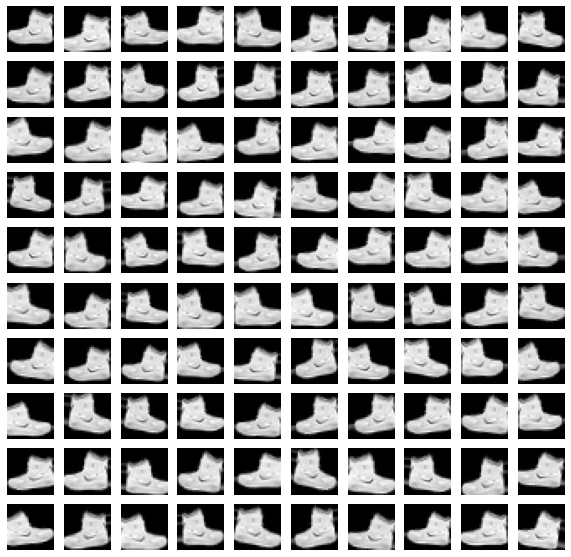

In [3]:
# 새롭게 생성된 이미지 표시

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for c in range(100):
  plt.subplot(10, 10, c + 1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28, 28), cmap = 'gray')

plt.show()

In [4]:
# 예제 6.15 : 이미지 보강

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 30000

# 중복되지 않는 정수를 원한다면 np.random.choice() -> replcae = False로 설정하면 됩니다.
randidx = np.random.randint(train_X.shape[0], size = augment_size)
# 원본 데이터에 영향을 주지 않기 위해 copy() 함수로 안전하게 복사본을 만들어줍니다.
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size = augment_size, shuffle = False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


In [5]:
# 예제 6.16 : VGGNet style 네트워크 + 이미지 보강학습

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32,
                                                    padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 256, padding = 'valid', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

Epoch 1/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.5861 - accuracy: 0.7854 - val_loss: 0.5870 - val_accuracy: 0.7732
Epoch 2/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3844 - accuracy: 0.8609 - val_loss: 0.5236 - val_accuracy: 0.7974
Epoch 3/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3467 - accuracy: 0.8747 - val_loss: 0.4559 - val_accuracy: 0.8284
Epoch 4/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3229 - accuracy: 0.8834 - val_loss: 0.4474 - val_accuracy: 0.8251
Epoch 5/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3127 - accuracy: 0.8877 - val_loss: 0.4192 - val_accuracy: 0.8416
Epoch 6/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.3007 - accuracy: 0.8921 - val_loss: 0.4084 - val_accuracy: 0.8479
Epoch 7/25
2110/2110 [==============================] - 16s 8ms/step - loss: 0.2954 - accuracy: 0.8939 - val_loss: 0.4159 - val_ac

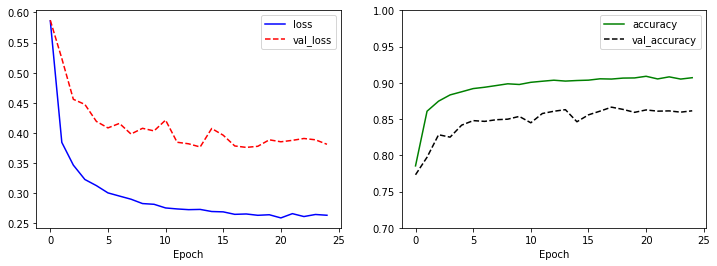

313/313 [==============================] - 1s 3ms/step - loss: 0.2138 - accuracy: 0.9191


[0.21378599107265472, 0.9190999865531921]

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)